In [ ]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading data

In [ ]:
# dict of lists
info = {
    'names':['dhruv','shakti','harsh','hasrhit','ravi'],
    'age' : [6,20,18,19,21],
    'height' : [5.2,3.5,5.2,5.5,6.0]
}
d1= pd.DataFrame(info)
d1


In [ ]:
d2 = pd.read_csv('datasample.csv')
d2

In [ ]:
pd.read_excel('Canada.xlsx')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_excel('Canada.xlsx',
    sheet_name=1,
    skiprows=20,
    skipfooter=2
)
df

## looking at the data
- df.head() - top n rows of the data
- df.tail() - bottom n rows of the data
- df.sample() - random n sample of the data
- df.info() - column wise datatypes
- df.describe() -summary statistics of data

In [ ]:
df.head(4)

In [ ]:
df.tail()

In [ ]:
df.sample(3)

In [ ]:
df.info()

In [ ]:
df.describe() # numerical columns

In [ ]:
df.describe(include='object')

## columns wise data

In [ ]:
df.columns

In [ ]:
df[2009] # series object

In [ ]:
# multiple columns
df[['AreaName', 'RegName']] # dataframe object

In [ ]:
years = list(range(1980,2014))
df[years]

In [ ]:
df[['OdName',1980,1990,2000,2010]]

In [ ]:
# row wise access using loc and iloc
df.loc[1] # label wise location

In [ ]:
df.iloc[1] # index wise location

In [ ]:
df.iloc[:10,[0,1,2,3,4]] # column should be indexes

In [ ]:
df.loc[:10,['OdName',1980,1990,2000,2010]] # columns should be labels

## manipulating data

In [ ]:
d2['total'] = d2['english'] + d2['maths'] + d2['science']
d2

In [ ]:
d2['avg'] = d2['total']/3
d2

In [ ]:
df

In [ ]:
df['total'] = df[years].sum(axis=1)
df

In [ ]:
df['dummy_col'] = 1 # we can add a dummy column and give the value 1
df

# dropping tha unwanted columns
- drop() - drop the columns
- dropna() - drop the rows with missing values
- drop_duplicates() - drop the duplicate rows

In [ ]:
# drop
cols_to_drop = ['Type','Coverage','AREA','REG','DEV','dummy_col']
df = df.drop(columns=cols_to_drop)

In [ ]:
df = df.rename(
    columns={
        'OdName': 'country',
        'AreaName': 'continent',
        'RegName':'region',
        'DevName':'status'
    }
)

In [ ]:
df

In [ ]:
sns.scatterplot(
    data= df,
    x='country',
    y='total',
    hue='status')

In [ ]:
df.iloc[:, 2:]

In [ ]:
df.sort_values(by='total') #ascending order

In [ ]:
df = df.sort_values(by='total', ascending=False) # descending order

In [ ]:
df.head(10)['total'].mean()

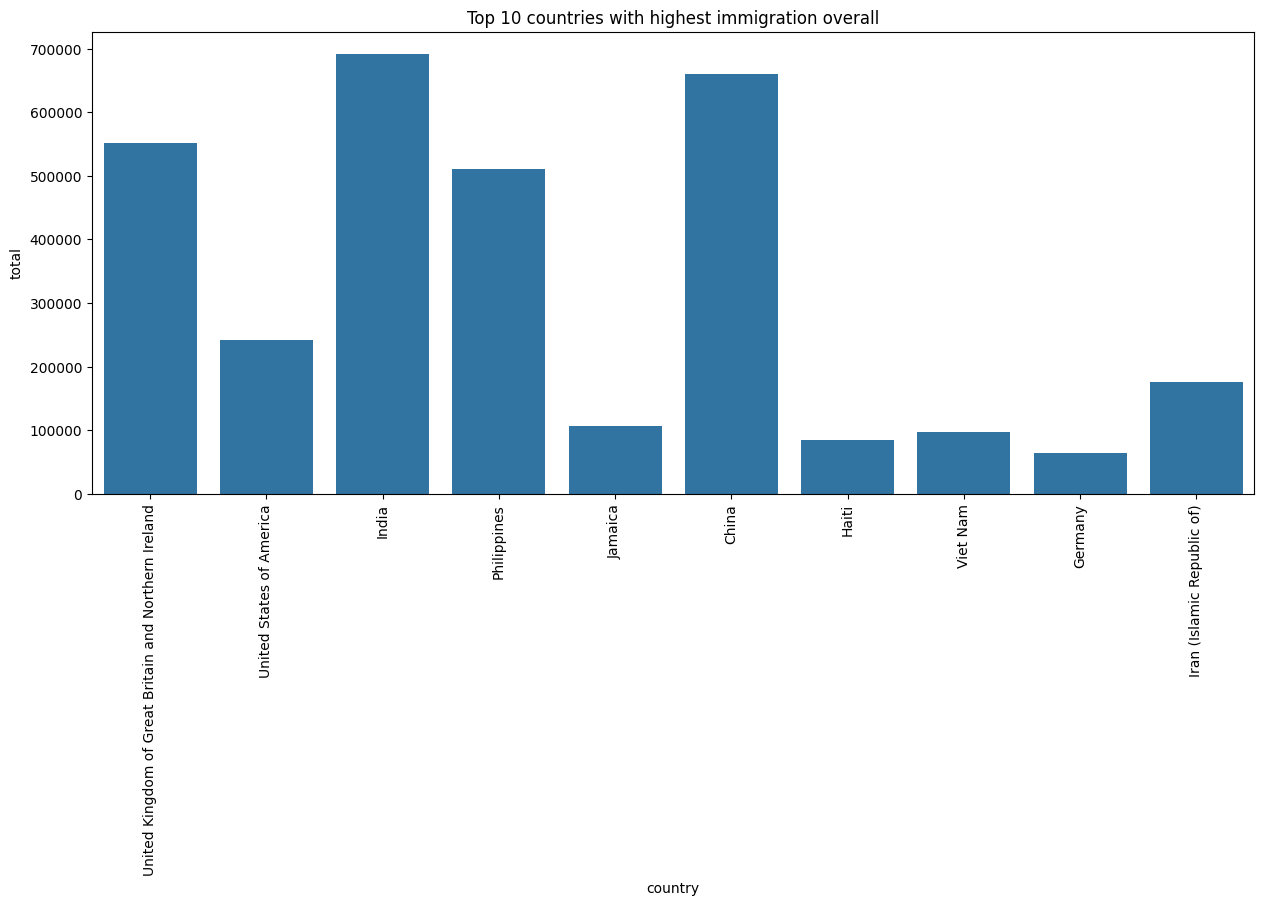

In [81]:
fig, ax =plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='total',data=df.head(10), ax=ax)
plt.title("Top 10 countries with highest immigration overall")
plt.xticks(rotation=90)
plt.show()

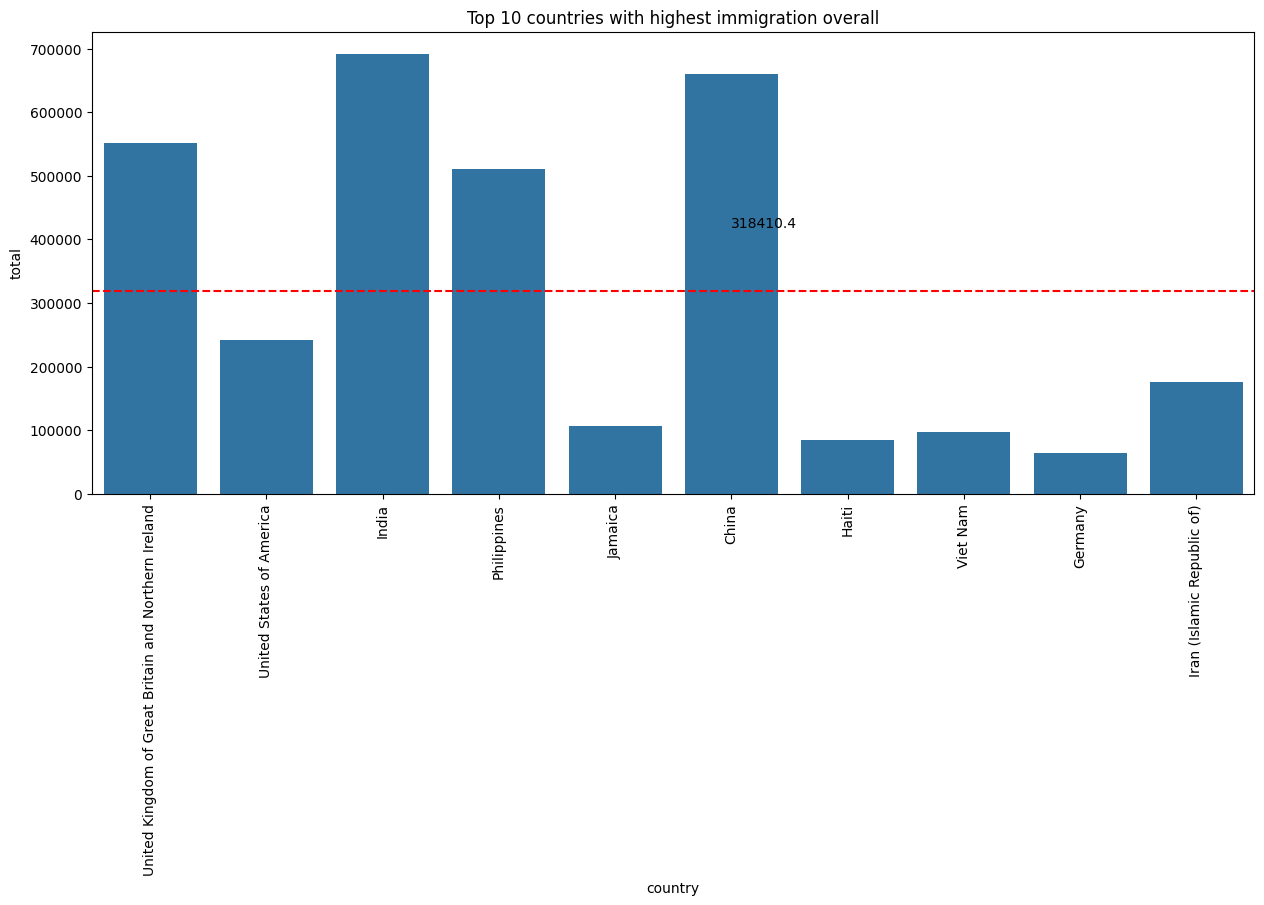

In [84]:
fig, ax =plt.subplots(figsize=(15,6))
sns.barplot(x='country',y='total',data=df.head(10), ax=ax)
ax.axhline(df.head(10)['total'].mean(),color='r',linestyle='--')
ax.text(5, df.head(10)['total'].mean()+100000,df.head(10)['total'].mean())
plt.title("Top 10 countries with highest immigration overall")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['country'].tolist()

In [ ]:
df = df.replace('United Kingdom of Great Britain and Northern Ireland ','UK')
df

In [ ]:
df['total_str'] = df['total'].apply(lambda i : f"{i//100000:.2f} lac")
df

# grouping data
- groupby() - group the data
    -

In [ ]:
df.groupby(by='continent') #groupby object

In [ ]:
# getting a particular group subset
df.groupby(by='continent').get_group('Asia') # only subset for aisa

In [ ]:
# getting group based stats
df.groupby(by='continent')['total'].sum()

In [ ]:
df.groupby(by='continent')[[1980,1981,1982,1983,1984]].sum()

In [ ]:
df.groupby(by='continent')[years].sum()

In [78]:
# when grouping on multiple columns , add reset_index to get the dataframe
df.groupby(by=['continent','status'])['total'].sum().reset_index()

,continent,status,total
0,Africa,Developing regions,618948
1,Asia,Developed regions,27707
2,Asia,Developing regions,3290087
3,Europe,Developed regions,1410947
4,Latin America and the Caribbean,Developing regions,765148
5,Northern America,Developed regions,241142
6,Oceania,Developed regions,34215
7,Oceania,Developing regions,20959


<Axes: ylabel='continent'>

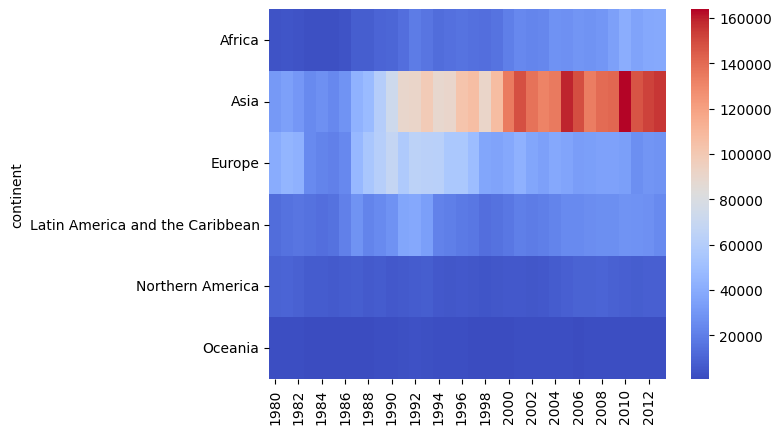

In [80]:
continent_df = df.groupby(by='continent')[years].sum()
sns.heatmap(continent_df, cmap='coolwarm')

<Axes: xlabel='continent'>

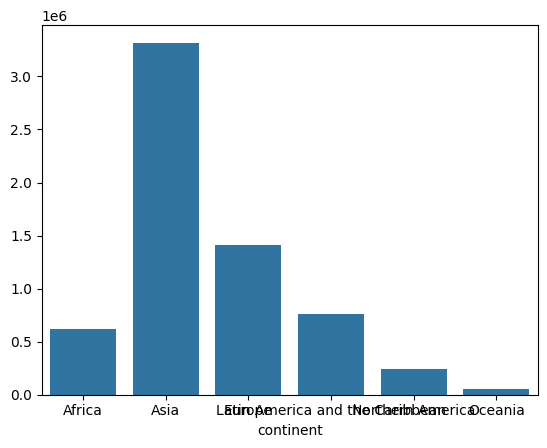

In [93]:
cdf = df.groupby(by='continent')['total'].sum()
sns.barplot(x=cdf.index,y=cdf.values) # in series we use index and values and index is treated as x axis and y serially

<Axes: >

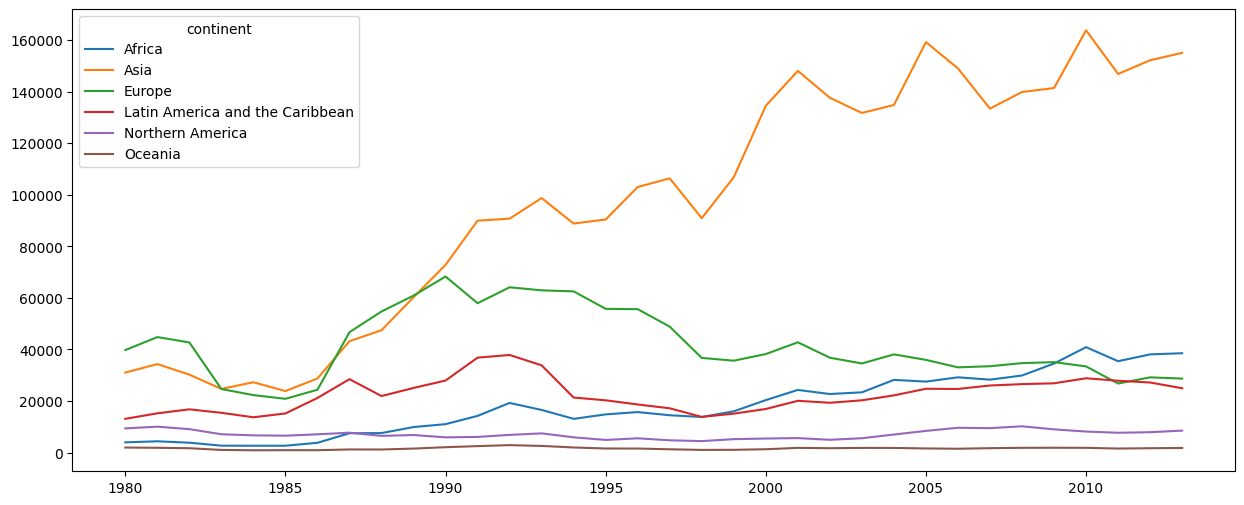

In [92]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=continent_df.T, dashes=False)

In [97]:
# 3 items for pivot - index, columns, values
# index and columns should be categorical type
# values must be numerical type
df2 = df.pivot_table(index='continent', columns='status',values='total')

<Axes: ylabel='Count'>

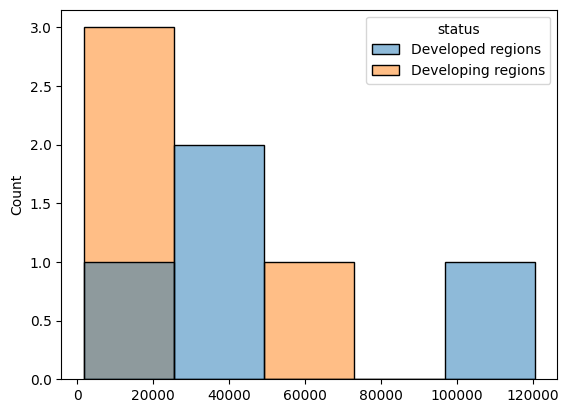

In [98]:
sns.histplot(df2, kde=False)

array([<Axes: ylabel='Developed regions'>,
       <Axes: ylabel='Developing regions'>], dtype=object)

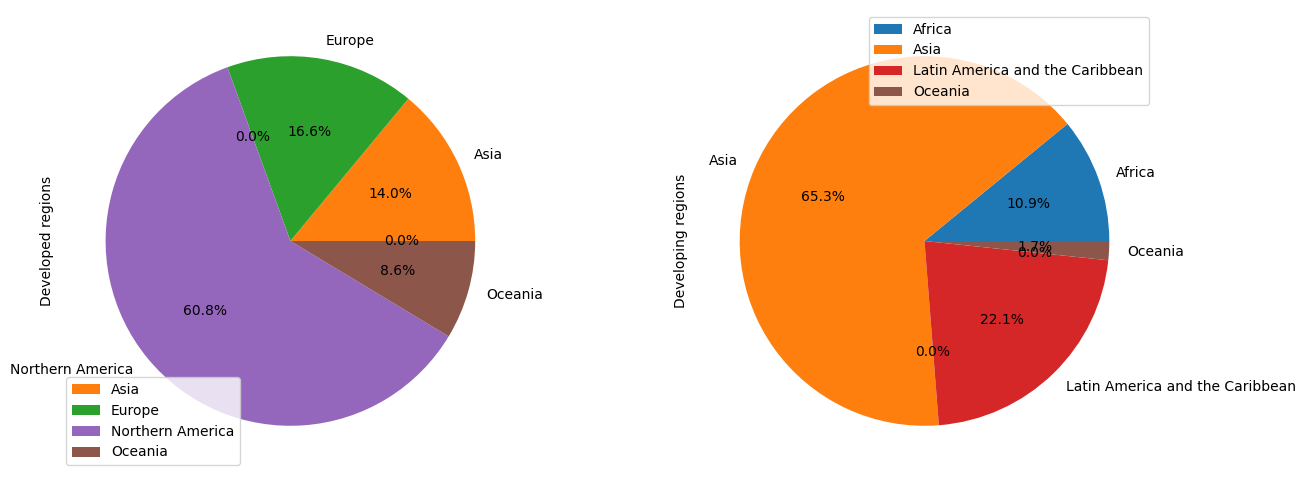

In [100]:
# pandas plot function
df2.plot(kind='pie', subplots=True, figsize=(15,6), autopct='%1.1f%%')